In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [17]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Дубликаты отсутствуют:

In [18]:
print(len(df))
df = df.drop_duplicates()
print(len(df)) 

2000
2000


### Обучение DecisionTreeClassifier

Разделение и подготовка данных

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

x = df.drop(columns=['price_range'])
y = df['price_range']

scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

scaled_minmax = scaler_minmax.fit_transform(x)
scaled_standard = scaler_standard.fit_transform(x)

x_minmax = pd.DataFrame(scaled_minmax, columns=x.columns)
x_standard = pd.DataFrame(scaled_standard, columns=x.columns)


Обучение

Точность модели: 0.81


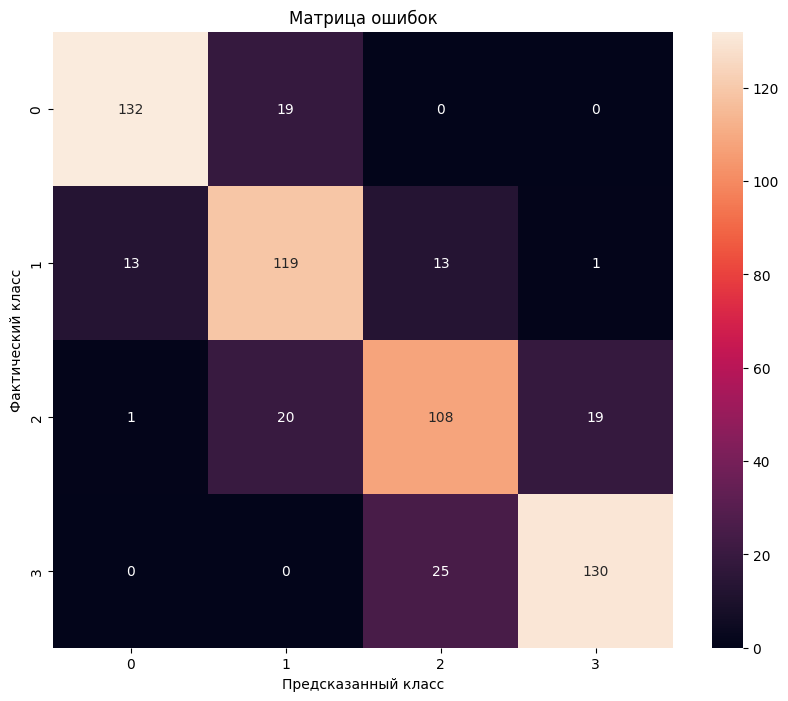

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def train(x, y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    accuracy = model.score(X_test, y_test)
    print(f"Точность модели: {accuracy:.2f}")

    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d')
    plt.title('Матрица ошибок')
    plt.ylabel('Фактический класс')
    plt.xlabel('Предсказанный класс')
    plt.show()

    return model

model = train(x, y)

Визуализация

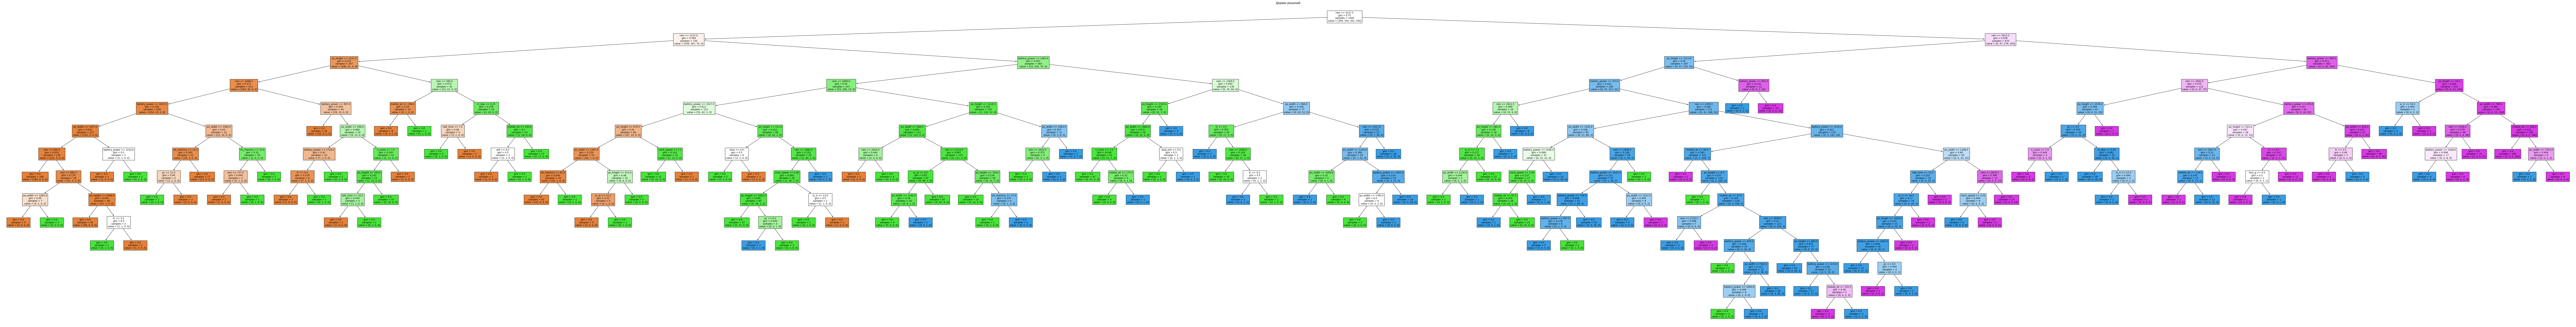

In [21]:
from sklearn import tree


def visualize(model):
    plt.figure(figsize=(200, 25))
    tree.plot_tree(model, feature_names=x.columns, filled=True, fontsize=10)
    plt.title("Дерево решений")
    plt.show()

visualize(model)

Обучение на нормализованных данных

Точность модели: 0.81


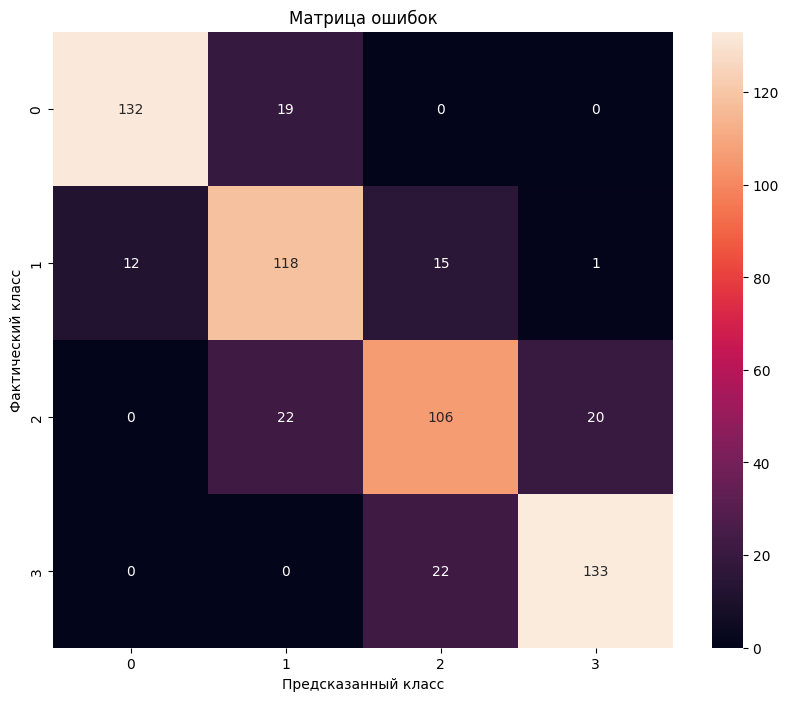

Точность модели: 0.81


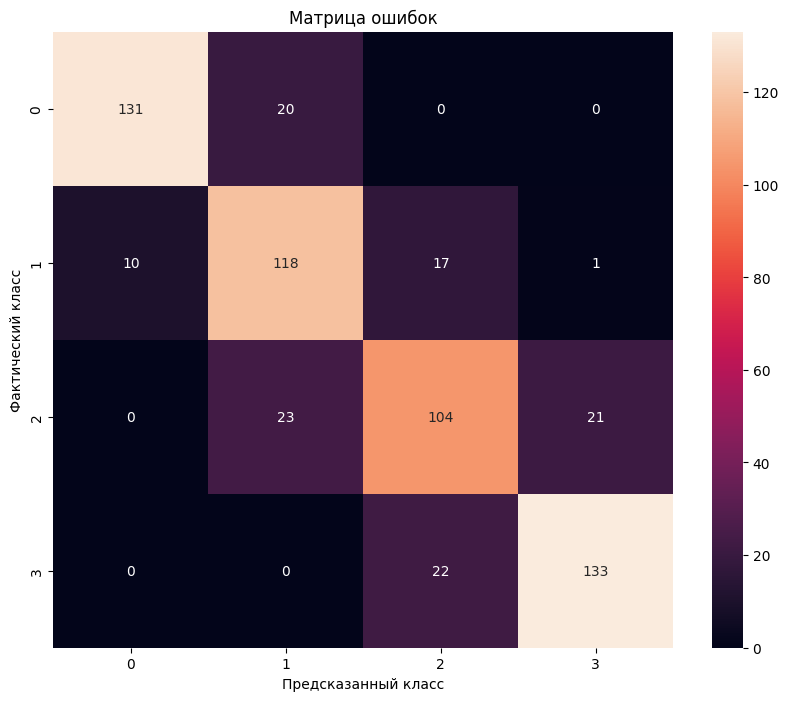

In [22]:
_= train(x_minmax, y)
_= train(x_standard, y)

Нормализация никак не отразалилась на результатах, посколько для деревьев решений это не особо важно

Подбор параметров с помощью RandomizedSearchCV

In [23]:
from sklearn.model_selection import RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

params = {
    'max_depth': [None, 5, 9, 10, 12, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

clf = DecisionTreeClassifier()

random_search = RandomizedSearchCV(estimator=clf, param_distributions=params, n_iter=10, n_jobs=-1)

random_search.fit(X_train, y_train)

print("Лучшие параметры:", random_search.best_params_)
print("Точность:", random_search.score(X_test, y_test))

Лучшие параметры: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 9, 'criterion': 'entropy'}
Точность: 0.86


Обучение RandomForestClassifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_clf.fit(X_train, y_train)
rf_predictions = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Точность RandomForestClassifier: {rf_accuracy:.2f}")


Точность RandomForestClassifier: 0.89


Обучение AdaBoostClassifier

In [25]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf = AdaBoostClassifier(n_estimators=50, learning_rate=0.1, random_state=42)
adaboost_clf.fit(X_train, y_train)
adaboost_predictions = adaboost_clf.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
print(f"Точность AdaBoostClassifier: {adaboost_accuracy:.2f}")

Точность AdaBoostClassifier: 0.40


Обучение GradientBoostingClassifier

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, subsample=0.8, random_state=42)
gb_clf.fit(X_train, y_train)
gb_predictions = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
print(f"Точность GradientBoostingClassifier: {gb_accuracy:.2f}")

Точность GradientBoostingClassifier: 0.92
